### Install dependencies 

In [ ]:
!pip install transformers requests beautifulsoup4 pandas numpy

In [71]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

### Instantiate Model

In [6]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/872k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/669M [00:00<?, ?B/s]

### Encode and Calculate Sentiment

In [195]:
tokens = tokenizer.encode('this is a cool stuff', return_tensors='pt')

In [196]:
result = model(tokens)

In [197]:
results.logits

tensor([[ 5.1815,  1.2660, -1.1355, -2.9506, -1.5399]],
       grad_fn=<AddmmBackward>)

In [198]:
int(torch.argmax(result.logits))+1

5

### Dataframe and Score

In [211]:
import numpy as np
import pandas as pd

In [212]:
df = pd.read_csv('new_website_reviews.csv')
df.drop(['Entity','Date','Hour','Channel Type','Sub-Channels','Unnamed: 6','Sentiment','Mobile','User','Application'], axis=1, inplace=True)
df.head()

,Comments
0,Easy helpful and fast
1,Human nature is tired when hearing a police si...
2,Good
3,"Slow system, law enforcement officers are high..."
4,"activation code did not receive all the day, I..."


In [213]:
df['Comments'].iloc[1]

'Human nature is tired when hearing a police site but I am proud to visit Dubai police website\n\nYour brother Abdullah Ahmed Mohamed Hamdan'

In [214]:
def sentiment_score(Comments):
    tokens = tokenizer.encode(Comments, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [215]:
sentiment_score(df['Comments'].iloc[1])

4

In [216]:
df['sentiment'] = df['Comments'].apply(lambda x: sentiment_score(x[:512]))

In [223]:
df

,Comments,sentiment
0,Easy helpful and fast,5
1,Human nature is tired when hearing a police si...,4
2,Good,4
3,"Slow system, law enforcement officers are high...",1
4,"activation code did not receive all the day, I...",1
...,...,...
236,Please am having fine for my car please how ca...,3
237,God always blessed you to make Dubai the most ...,5
238,Even your not action to my file case its fine,4
239,Congrats Wow Wow New Web Site \nThank you,5


In [224]:
df.to_csv(r'New_Website_Sentiment_Scores.csv')

In [218]:
df['sentiment'].value_counts()

5    93
1    89
4    23
3    20
2    16
Name: sentiment, dtype: int64

In [219]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

Text(0.5, 0, 'Score')

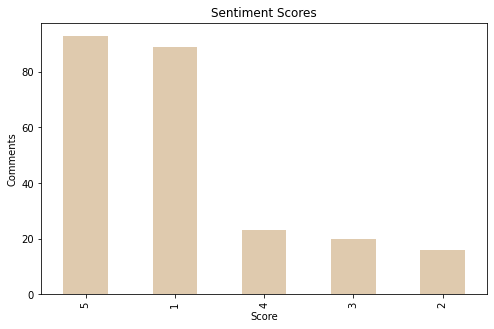

In [220]:
df['sentiment'].value_counts(sort=True).nlargest(10).plot.bar(alpha=0.70, color='tan',figsize=(8, 5))
plt.title('Sentiment Scores')
plt.ylabel('Comments')
plt.xlabel('Score')

<AxesSubplot:ylabel='sentiment'>

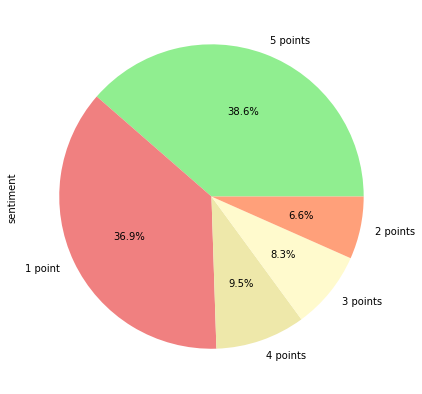

In [221]:
colors = ['lightgreen', 'lightcoral', 'palegoldenrod', 'lemonchiffon','lightsalmon']
labels = '5 points', '1 point', '4 points','3 points','2 points'
df['sentiment'].value_counts().plot.pie(figsize=(10, 7), colors=colors, labels=labels, autopct='%1.1f%%')